# Dyskinesias Models using Stat Features

This notebook covers all the process of definition preprocessing, training and evaluation for 3 Dyskinesias inference models. The proposed models are: SVM, KNN and Gradient Boost classifier.

All the models aim to classify if a person appears to have Dyskinesias (1) or not (0) during a 6 meters walk.

This model will use statistical descriptive data from the walk as features for model training.

## Requiered Imports

In [1]:
import os
import pickle


from src.settings import ROOT_DIR
from src.model.standard_models_builder import build_models_modules
from src.evaluation.model_metrics_report import print_sklearn_model_metrics

## Load Data

In [2]:
train_data_path = ROOT_DIR / 'data' / 'processed' / 'dysk-features' / 'train.pkl'
val_data_path = ROOT_DIR / 'data' / 'processed' / 'dysk-features' / 'val.pkl'

with open(train_data_path, 'rb') as file:
    train_data = pickle.load(file)

with open(val_data_path, 'rb') as file:
    val_data = pickle.load(file)

In [3]:
len(train_data)

9426

In [4]:
features = train_data.columns.tolist()
target = features.pop(-1)

X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]

## Models
Define and train the models using GridSearch

In [5]:
svm, knn, gboost = build_models_modules(X_train, y_train)

Started Grid Search - Model: SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters SVM: {'C': 1000, 'kernel': 'poly'}
Finished Grid Search - Model: SVM
Started Grid Search - Model: KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters KNN: {'n_neighbors': 3, 'weights': 'distance'}
Finished Grid Search - Model: KNN
Started Grid Search - Model: Gradient Boosting Classifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters Gradient Boosting Classifier: {'learning_rate': 0.1, 'n_estimators': 64, 'n_iter_no_change': 20}
Finished Grid Search - Model: Gradient Boosting Classifier


## Train Metrics

Accuracy: 0.954169318905156
0.4737193917629461
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      8793
           1       0.96      0.33      0.49       633

    accuracy                           0.95      9426
   macro avg       0.96      0.66      0.73      9426
weighted avg       0.95      0.95      0.94      9426

AUC-ROC: 0.6646319805230679
AUC-PR: 0.6691446905013372


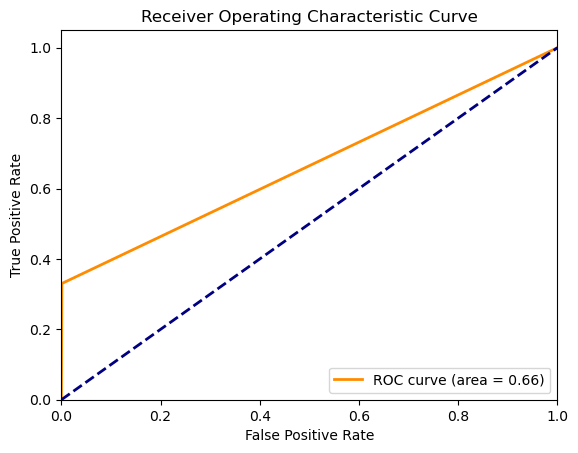

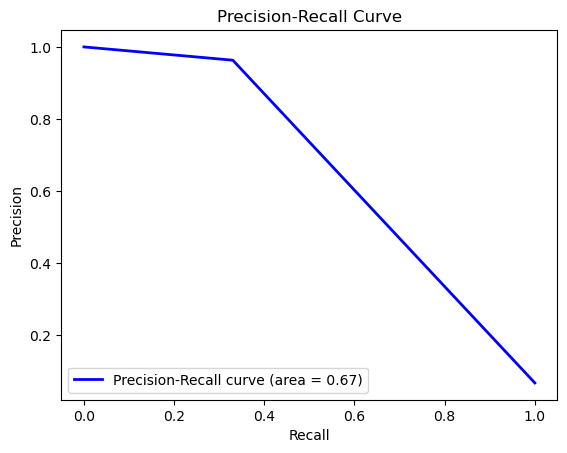

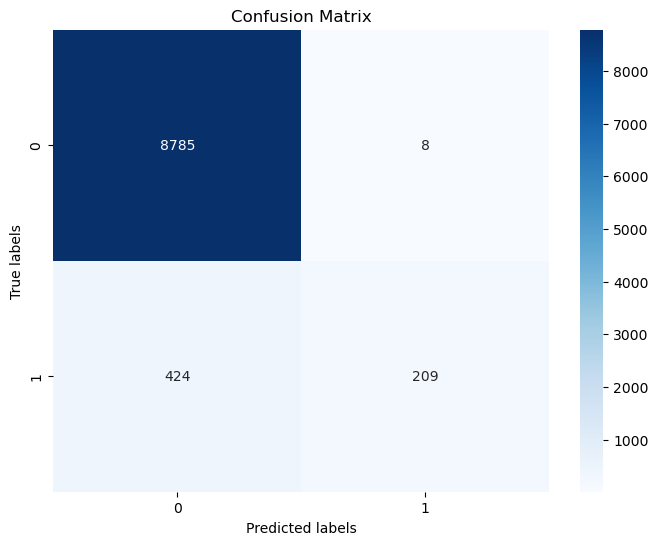

In [6]:
print_sklearn_model_metrics(svm, X_train, y_train.to_numpy())

Accuracy: 1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8793
           1       1.00      1.00      1.00       633

    accuracy                           1.00      9426
   macro avg       1.00      1.00      1.00      9426
weighted avg       1.00      1.00      1.00      9426

AUC-ROC: 1.0
AUC-PR: 1.0


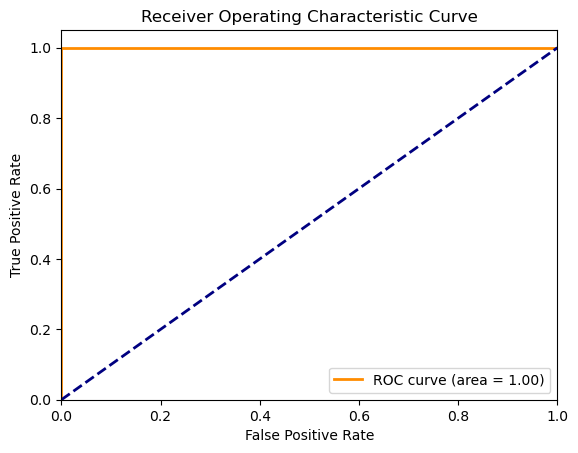

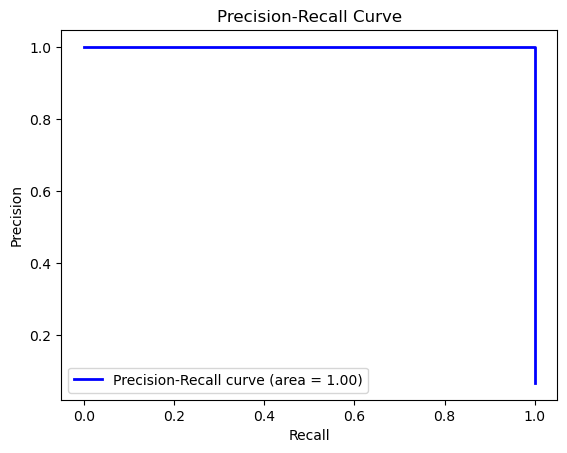

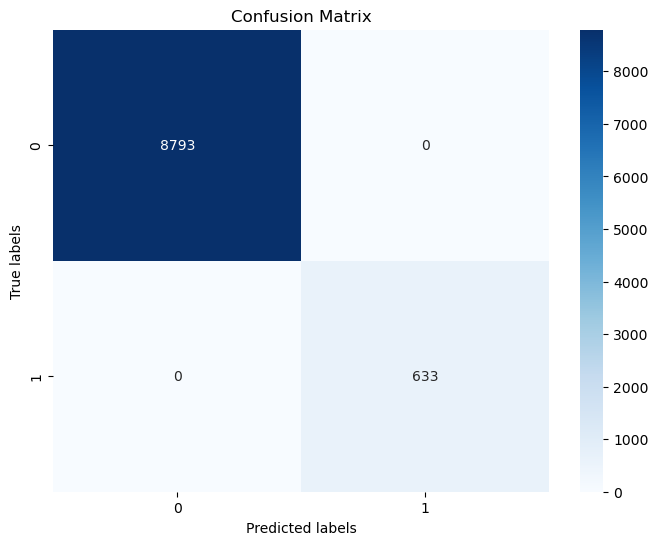

In [7]:
print_sklearn_model_metrics(knn, X_train, y_train.to_numpy())

Accuracy: 0.9696583916825801
0.7040228768223298
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8793
           1       0.95      0.58      0.72       633

    accuracy                           0.97      9426
   macro avg       0.96      0.79      0.85      9426
weighted avg       0.97      0.97      0.97      9426

AUC-ROC: 0.7880191211988424
AUC-PR: 0.7785871549238077


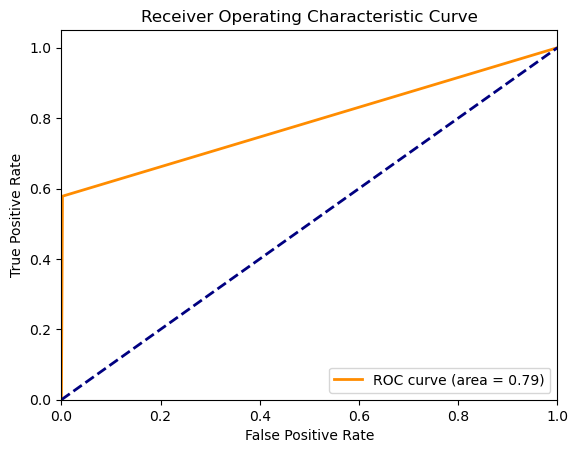

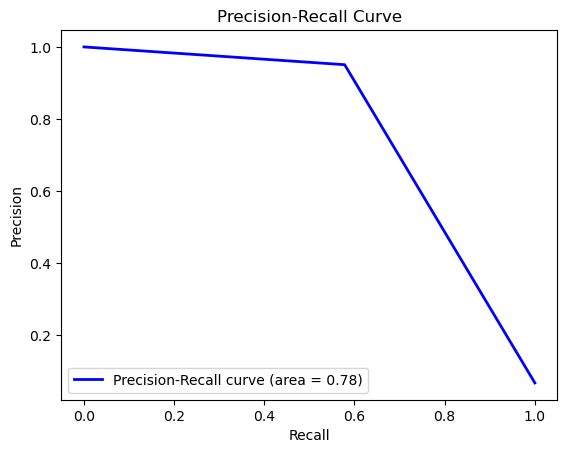

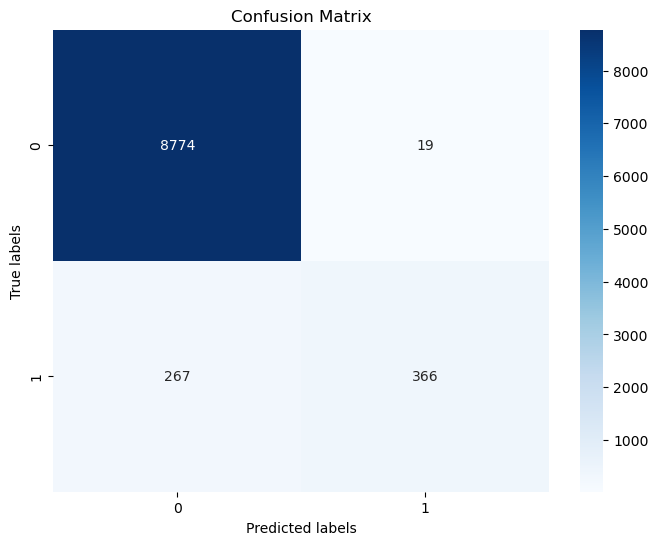

In [8]:
print_sklearn_model_metrics(gboost, X_train, y_train)

## Val Metrics

Accuracy: 0.950132625994695
0.4390839965304817
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1759
           1       0.83      0.32      0.46       126

    accuracy                           0.95      1885
   macro avg       0.89      0.66      0.72      1885
weighted avg       0.95      0.95      0.94      1885

AUC-ROC: 0.6564561394009945
AUC-PR: 0.5982084964843586


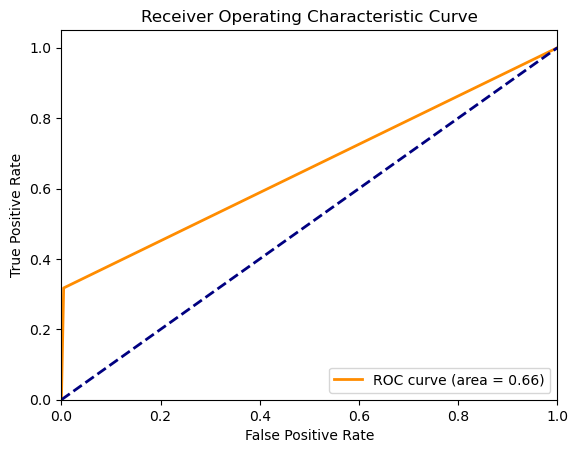

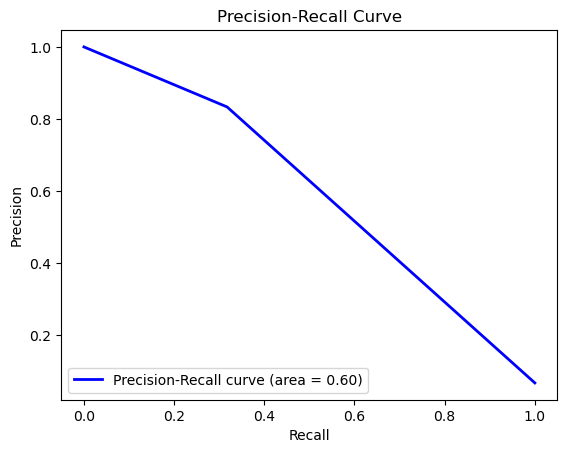

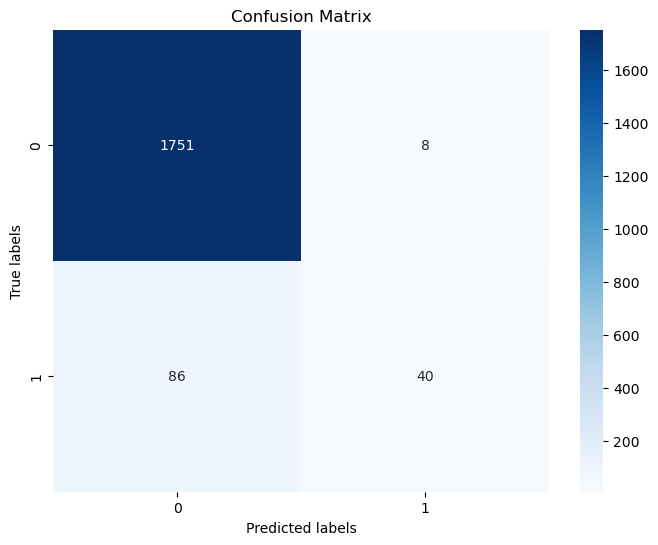

In [9]:
print_sklearn_model_metrics(svm, X_val, y_val)

Accuracy: 0.9830238726790451
0.8576257104552578
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1759
           1       0.91      0.83      0.87       126

    accuracy                           0.98      1885
   macro avg       0.95      0.91      0.93      1885
weighted avg       0.98      0.98      0.98      1885

AUC-ROC: 0.9098558885369574
AUC-PR: 0.8746743073421839


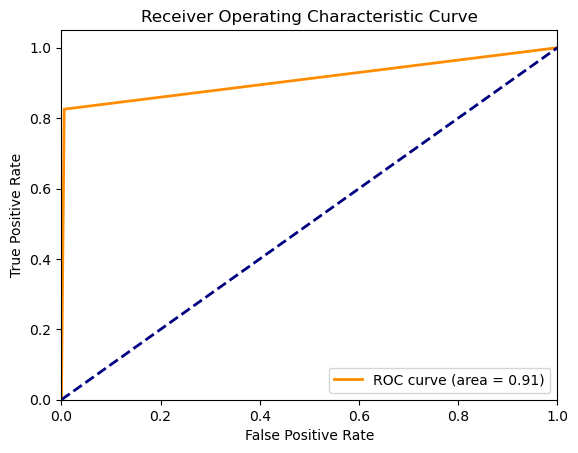

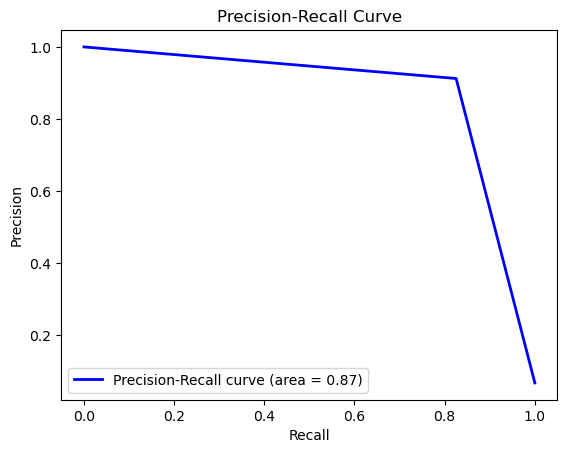

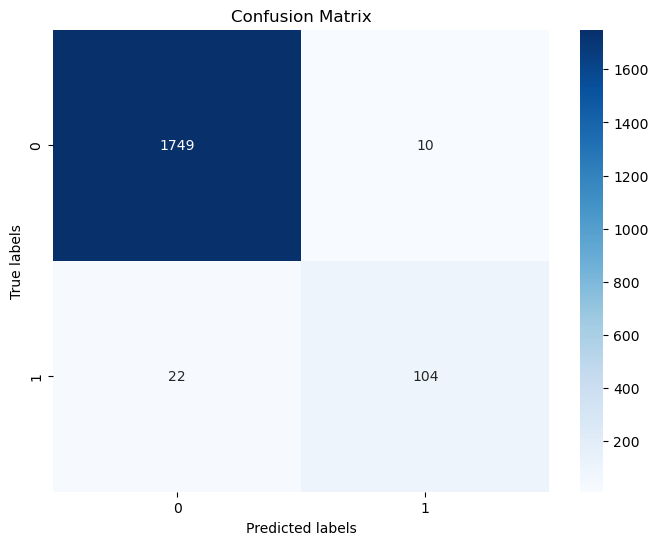

In [10]:
print_sklearn_model_metrics(knn, X_val, y_val)

Accuracy: 0.9671087533156498
0.6825478745076735
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1759
           1       0.90      0.57      0.70       126

    accuracy                           0.97      1885
   macro avg       0.94      0.78      0.84      1885
weighted avg       0.97      0.97      0.96      1885

AUC-ROC: 0.7834402663851214
AUC-PR: 0.7500378931413414


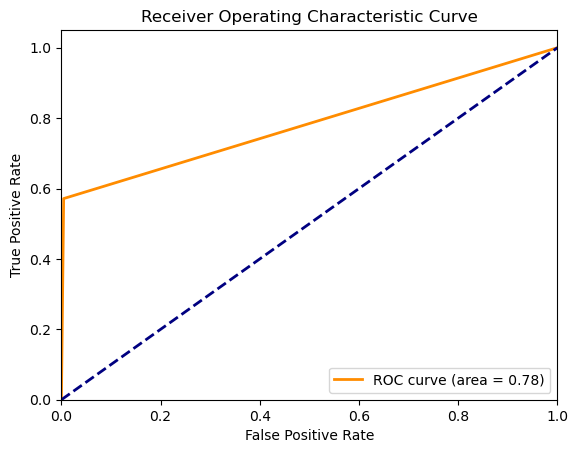

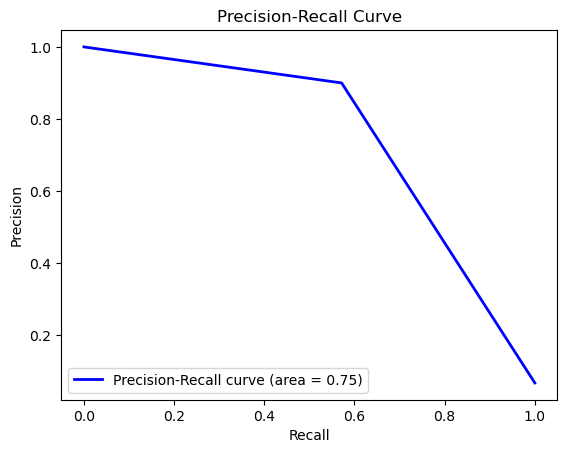

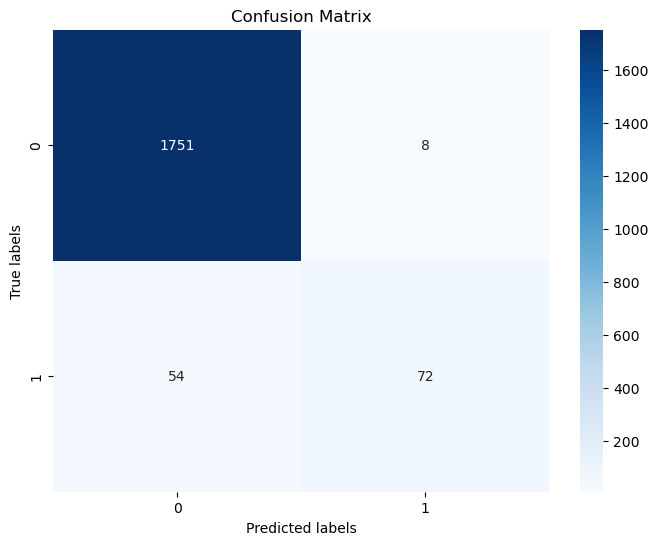

In [11]:
print_sklearn_model_metrics(gboost, X_val, y_val)

## Save models

In [12]:
save_path = str(ROOT_DIR) + '/results/models/dysk-features/'

os.makedirs(save_path, exist_ok=True)

with open(save_path + 'model.svm.pkl', 'wb') as file:
    pickle.dump(svm, file)
    file.close()
    
with open(save_path + 'model.knn.pkl', 'wb') as file:
    pickle.dump(knn, file)
    file.close()
    
with open(save_path + 'model.gboost.pkl', 'wb') as file:
    pickle.dump(gboost, file)
    file.close()
    